In [1]:
import numpy as np
#import scipy.stats
from scipy.stats import norm
from scipy.stats import t as student_t
import pylab as plt
import random

## Monte Carlo integration

You might have seen this already, but Monte Carlo integration is an absolute crucial notion in modern statistics (modern because it relies on generating a large number of data points, which has been made possible by computers). Suppose you have very a complicated integral to solve and that you can write down the integrand as a product of $f(x)$ and $p(x)$ with $\int p(x)=1$ (this is not restrictive at all! See below). My nasty integral is

$$\int f(x) p(x) dx$$


Provided one can **evaluate** $f(x)$ and **sample** $p(x)$, then


$$\int f(x) p(x) dx \approx \frac{1}{N}\sum_{i=1}^N f(x_i) $$

where $x_i$ are samples drawn from $p$. 








### Exercise

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)

### Solution

$$ I = \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = \sqrt{2 \pi \sigma^2} \int_0^\infty x^3 \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{x^2}{2\sigma^2}\right)dx = \sqrt{2 \pi \sigma^2} \int_0^\infty x^3 n(x) dx $$

$$\int_{-\infty}^\infty n(x) dx = 1$$

I will use gaussian function to sample. The only problem is that doing so I will include negative numbers as well. I will tranform them in positive numbers by using np.abs, and I will devide by 2. 

In [2]:
sigma = 2
knownresult = 2*sigma**4

def integral_MC(N):
    x = norm(0,sigma).rvs(N)
    y = abs(x)**3
    return np.mean(y) * np.sqrt(2*np.pi*sigma**2)/2
    

How is the error going with N?
We expect as $1/\sqrt{N}$, MC integral as a matter of fact are means and the error must scale as the error of the mean.

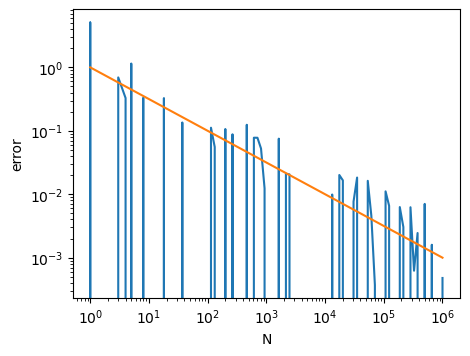

In [3]:
n = np.logspace(0,6,100,dtype=int)
error = []
for N in n:
    integral = integral_MC(N)
    error.append((integral - knownresult)/knownresult)

fig, ax = plt.subplots(figsize=(5, 3.75))

ax.plot(n,error)
ax.plot(n,1/np.sqrt(n))
ax.set(xscale = "log", yscale = "log",xlabel=("N"),ylabel=("error"))

plt.show()

For a given $N$, how are the result distributed? 
As gaussian? As t of student?

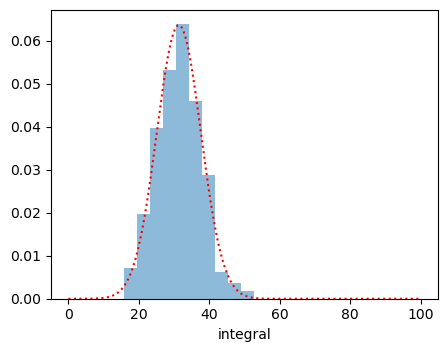

In [9]:
realizations = 300

N = 100
I = []
for _ in range(realizations): 
    I.append(integral_MC(N))

mean = np.average(I)
std = np.std(I, ddof=1)

fig, ax = plt.subplots(figsize=(5, 3.75))

ax.hist(I,density=True,alpha=0.5)
ax.set(xlabel=("integral"))

x = np.linspace(0, 100, 1000)
ax.plot(x,norm(loc=mean,scale=std).pdf(x),linestyle=':',c='red')

plt.show()

z and t of student variables?

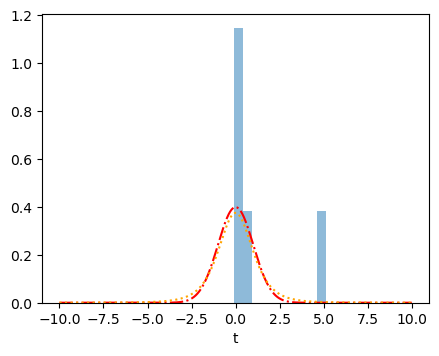

In [19]:
realizations = 5
N = 100
I = []
for _ in range(realizations): 
    I.append(integral_MC(N))

mean = np.average(I)
std = np.std(I, ddof=1)

#z = (I - np.full(realizations, knownresult))/std
t = (I - np.full(realizations, knownresult))/(std/np.sqrt(realizations))

fig, ax = plt.subplots(figsize=(5, 3.75))

ax.hist(t,density=True,alpha=0.5)
ax.set(xlabel=("t"))

x = np.linspace(-10, 10, 1000)
ax.plot(x,norm(0,1).pdf(x),linestyle='-.',c='red')
ax.plot(x,student_t(df=realizations-1).pdf(x),linestyle=':',c='orange')

plt.show()


How does the distribution changes with N?

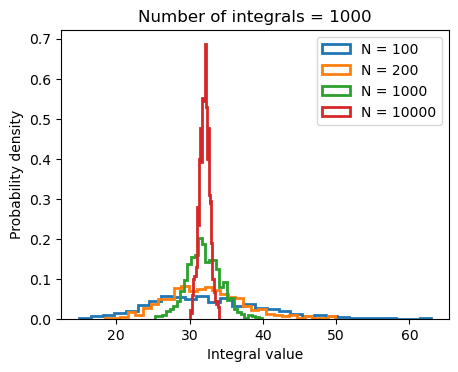

In [34]:
N = [100,200,1000,10000]
M = 1000
I = [[] for _ in range(4)]
for i in range(4):
    for _ in range(M):
        I[i].append(integral_MC(N[i]))

fig, ax = plt.subplots(figsize=(5, 3.75))

colors = ['C0', 'C1', 'C2', 'C3']
labels = [f'N = {n}' for n in N]

for i in range(4):
    ax.hist(I[i], bins=30, density=True, histtype='step', lw=2, 
            color=colors[i], label=labels[i])

ax.set_xlabel('Integral value')
ax.set_ylabel('Probability density')
ax.legend(loc='upper right')
ax.set_title('Number of integrals = %i' %M)

plt.show()

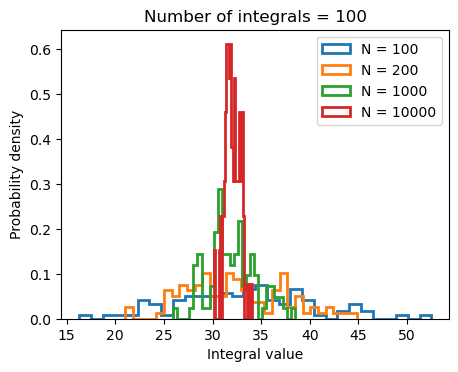

In [33]:
N = [100,200,1000,10000]
M = 100
I = [[] for _ in range(4)]
for i in range(4):
    for _ in range(M):
        I[i].append(integral_MC(N[i]))

fig, ax = plt.subplots(figsize=(5, 3.75))

colors = ['C0', 'C1', 'C2', 'C3']
labels = [f'N = {n}' for n in N]

for i in range(4):
    ax.hist(I[i], bins=30, density=True, histtype='step', lw=2, 
            color=colors[i], label=labels[i])

ax.set_xlabel('Integral value')
ax.set_ylabel('Probability density')
ax.legend(loc='upper right')
ax.set_title('Number of integrals = %i' %M)

plt.show()